In [1]:
!curl -L "https://app.roboflow.com/ds/4ofcPozFdH?key=4ET3gKrb5m" > roboflow.zip
!unzip roboflow.zip 
!rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   907  100   907    0     0   1559      0 --:--:-- --:--:-- --:--:--  1558
100 15.3M  100 15.3M    0     0  13.6M      0  0:00:01  0:00:01 --:--:-- 13.6M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing

In [3]:
from ultralytics import YOLO
model=YOLO("yolov8m-seg.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# # %load /kaggle/working/data.yaml
# train: train/images
# val: valid/images
# test: test/images

# names: 
#   0: Buildings

In [5]:
%%writefile /kaggle/working/data.yaml

train: ../train/images
val: ../valid/images

names: 
  0: Buildings

Overwriting /kaggle/working/data.yaml


In [6]:
import os
import random
import shutil
from pathlib import Path

# Paths
train_images_dir = "/kaggle/working/train/images"
train_labels_dir = "/kaggle/working/train/labels"
val_images_dir = "/kaggle/working/valid/images"
val_labels_dir = "/kaggle/working/valid/labels"

# Create validation folders if not exist
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Get all image files from the train/images directory
image_files = [f for f in os.listdir(train_images_dir) if os.path.isfile(os.path.join(train_images_dir, f))]
random.shuffle(image_files)  # Shuffle for unbiased splitting

# Split data: 80% train, 20% val
split_idx = int(0.8 * len(image_files))
val_images = image_files[split_idx:]  # Validation images (last 20%)

# Move images and corresponding labels to validation folder
for img in val_images:
    # Move the image
    src_image_path = os.path.join(train_images_dir, img)
    dest_image_path = os.path.join(val_images_dir, img)
    shutil.move(src_image_path, dest_image_path)

    # Move the corresponding label (if exists)
    label_file = Path(train_labels_dir) / (Path(img).stem + ".txt")
    if label_file.exists():
        dest_label_path = os.path.join(val_labels_dir, label_file.name)
        shutil.move(label_file, dest_label_path)

print("Dataset splitting into train/valid directories is complete!")


Dataset splitting into train/valid directories is complete!


In [7]:
result=model.train(
    data= "/kaggle/working/data.yaml",
    project= "output_model",
    name="epoc",
    epochs=100,
    batch=8,
    imgsz=512,
    
)

Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=epoc4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels... 89 images, 0 backgrounds, 2 corrupt: 100%|██████████| 89/89 [00:00<00:00, 1146.66it/s]

train: /kaggle/working/train/images/12_png.rf.e461aee0ccff8b768883f61293f84857.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0419]
train: /kaggle/working/train/images/2_png.rf.7e079bf4d16f210786ae65c1521ccc6e.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0046]
train: New cache created: /kaggle/working/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 682.9±620.3 MB/s, size: 91.4 KB)


val: Scanning /kaggle/working/valid/labels... 97 images, 1 backgrounds, 1 corrupt: 100%|██████████| 97/97 [00:00<00:00, 1034.79it/s]

val: /kaggle/working/valid/images/2_png.rf.c8e0548963effd3aefab47fb5c40f974.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0407]
val: New cache created: /kaggle/working/valid/labels.cache


Plotting labels to output_model/epoc4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to output_model/epoc4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.88G      1.678      4.276      2.512      1.691         94        512: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all         96        858      0.442      0.514      0.404      0.269       0.45      0.492        0.4      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.93G     0.9834      1.587      1.154      1.193        153        512: 100%|██████████| 11/11 [00:03<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]

                   all         96        858      0.807      0.653      0.704      0.482      0.807      0.653       0.69      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.01G     0.8784      1.382       1.11      1.125        126        512: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all         96        858      0.707      0.431      0.473      0.284      0.709      0.432      0.464      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.06G     0.9829      1.564     0.9671      1.193        139        512: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all         96        858      0.268      0.501      0.212      0.118      0.268      0.492        0.2      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.08G     0.9482      1.412      1.018      1.208         68        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all         96        858      0.395      0.505      0.392      0.234      0.392      0.501      0.366      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.15G     0.9476      1.316     0.9213      1.161         89        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]

                   all         96        858      0.239      0.596      0.255      0.139      0.227      0.565      0.224      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.23G      1.017      1.393     0.8382      1.176        120        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all         96        858     0.0679       0.52     0.0539     0.0229     0.0572      0.436     0.0385     0.0184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.23G      1.034      1.414     0.9278      1.206        191        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all         96        858     0.0722      0.664     0.0641     0.0339     0.0667       0.51     0.0513     0.0286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.31G      1.083      1.383     0.8611       1.19        100        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]

                   all         96        858     0.0839      0.576     0.0728     0.0367     0.0782      0.536     0.0632     0.0328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.38G     0.9993      1.448     0.9431        1.2        102        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]

                   all         96        858      0.211      0.503      0.216       0.13      0.218      0.456      0.201      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.46G      1.037       1.45     0.9675      1.226        129        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]

                   all         96        858      0.335      0.513      0.313      0.201      0.328        0.5      0.291      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.52G     0.9358      1.342     0.8046      1.175        129        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]

                   all         96        858      0.259       0.41       0.19      0.105      0.256      0.396      0.172     0.0912



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.61G     0.9673      1.259      0.817      1.169        165        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]

                   all         96        858      0.506      0.505      0.476      0.314      0.499       0.48      0.446      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.61G     0.8971      1.336     0.8378      1.156         97        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all         96        858      0.708      0.654      0.697      0.475       0.71      0.626      0.657      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.61G     0.8952      1.401     0.8057      1.159         99        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858        0.7      0.639      0.715      0.398      0.721      0.554      0.639      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.61G     0.9215      1.262     0.7697      1.157         82        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all         96        858      0.735      0.695      0.753      0.527      0.711       0.64      0.684      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.61G      0.918       1.42     0.7971      1.163         89        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all         96        858        0.7      0.718      0.751      0.547       0.72      0.664      0.697      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.61G     0.8336       1.25     0.7175      1.108        114        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all         96        858      0.707      0.705      0.736       0.53      0.709      0.697      0.712      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.61G     0.8289      1.185      0.697      1.103        147        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all         96        858      0.734      0.735      0.778      0.579      0.729      0.732      0.751      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.61G     0.8172       1.17     0.6887      1.089         71        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all         96        858      0.691      0.732      0.732      0.541      0.696      0.727      0.714       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.61G     0.8425      1.188     0.7702      1.108        140        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.778      0.751      0.828      0.597      0.774      0.746      0.791      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.61G      0.869      1.295     0.7921       1.12         93        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all         96        858      0.801      0.734       0.81      0.604      0.802      0.714       0.76      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.61G     0.7807      1.104     0.6519      1.064        112        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all         96        858      0.738      0.728       0.78       0.58      0.757        0.7      0.744      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.61G     0.8674      1.188      0.785       1.13        115        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all         96        858      0.742       0.76      0.794      0.592      0.749      0.731      0.753      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.61G     0.9014       1.41     0.8128      1.162         82        512: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all         96        858      0.789       0.76      0.824      0.617      0.787      0.747      0.791      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.61G     0.8208      1.132     0.7102      1.082         91        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

                   all         96        858      0.813      0.747      0.819      0.624      0.817      0.731       0.79      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.61G      0.754      1.039     0.6554      1.064        134        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all         96        858      0.783      0.778      0.792      0.602      0.782      0.763      0.767       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.61G     0.7913      1.149     0.6814      1.093         74        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.797      0.759      0.816      0.604      0.806      0.734      0.786      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.61G     0.8129      1.253     0.6547      1.097        107        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]

                   all         96        858      0.812      0.729       0.83       0.63      0.814      0.721      0.794        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.61G       0.82      1.359     0.7126      1.116         82        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.773      0.726      0.821      0.636      0.796      0.693      0.781      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.61G     0.8061      1.238     0.6812      1.094         92        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.729      0.749      0.767      0.578      0.722      0.742      0.737      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.61G     0.7658      1.161     0.6311      1.083         78        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

                   all         96        858      0.683       0.83      0.786      0.609      0.722      0.756      0.757      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.61G     0.7509       1.24     0.6305      1.089         91        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.757        0.8       0.82       0.64      0.769      0.733      0.772      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.61G     0.7338      1.137      0.593      1.042        133        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all         96        858      0.714      0.769      0.789      0.615      0.742      0.703       0.75      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.61G     0.7271      1.151     0.6462      1.059        116        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all         96        858      0.706      0.684      0.732      0.557      0.703      0.678      0.699        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.61G     0.7231      1.048     0.5903      1.037        136        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all         96        858      0.772      0.773      0.816      0.638      0.793      0.747      0.783      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.61G     0.7721      1.081     0.6215      1.074        108        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]

                   all         96        858      0.809      0.796       0.85      0.666      0.812      0.786      0.813      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.61G     0.7174      1.031     0.5853      1.045        156        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.796        0.8      0.856      0.666      0.829      0.756      0.815      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.61G      0.742      1.159     0.6168      1.071         75        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all         96        858      0.799      0.745      0.838       0.64      0.803      0.742      0.805      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.61G      0.727      1.037     0.5936      1.036        104        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all         96        858      0.795      0.782      0.842      0.647      0.799      0.768      0.808      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.61G     0.7138      1.108     0.5704       1.04        122        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

                   all         96        858      0.824      0.785      0.858      0.654       0.84      0.755      0.826      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.61G     0.7168       1.02     0.5632      1.029         95        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all         96        858      0.809      0.789      0.842       0.65      0.841       0.74      0.806      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.61G     0.6924     0.9865     0.5609      1.026         86        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.841      0.769      0.841       0.65      0.839      0.767      0.811      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.61G     0.6996      1.107     0.5526      1.015        133        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.822      0.807      0.859      0.665      0.847       0.77      0.829      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.61G     0.6858       1.11      0.554      1.056         91        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all         96        858      0.855      0.808      0.872      0.686       0.85      0.788      0.839      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.61G     0.6841      1.059     0.5194      1.022         84        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.852      0.803      0.875      0.684      0.859       0.77      0.834      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.61G     0.6965      1.003     0.5576      1.024         80        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]

                   all         96        858      0.865      0.775      0.878      0.687      0.858      0.768      0.846      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.61G     0.6999      1.038     0.5433      1.025        101        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.876      0.759      0.866      0.667      0.868      0.752      0.835      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.61G     0.7089      1.104     0.5448      1.027        109        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.824      0.823      0.865      0.679      0.847       0.77      0.821      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.61G     0.6907      1.016     0.5494       1.02         98        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]

                   all         96        858      0.812      0.826      0.874      0.679      0.832      0.774      0.835      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.61G     0.6864      1.073     0.5213       1.02        142        512: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all         96        858      0.825      0.798       0.86      0.671      0.823      0.768      0.817      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.61G     0.6921     0.9613      0.541      1.011        114        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.774      0.811      0.844       0.67      0.785      0.788      0.806      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.61G     0.6754     0.9184      0.509      1.012        125        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.789      0.798      0.843      0.671      0.787      0.774      0.804      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.61G     0.7002      1.091      0.528       1.02        122        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.788      0.787      0.842      0.671      0.796      0.768      0.804      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.61G     0.6625     0.9584      0.508      1.028        117        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all         96        858       0.79      0.818      0.862      0.683      0.777      0.802      0.825      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.61G     0.6599     0.9902     0.5173      1.015        108        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]

                   all         96        858      0.827      0.814      0.878      0.696      0.825      0.764      0.827      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.61G     0.6425     0.9189      0.516      1.011        132        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.818      0.812      0.855      0.668      0.821      0.794      0.818       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.61G     0.6639      1.018     0.4901      1.005        136        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all         96        858      0.785      0.819      0.844      0.664      0.782      0.807      0.815      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.61G     0.6603      1.054     0.4957      1.009        131        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.779      0.802      0.846      0.674      0.775      0.788      0.818      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.61G     0.6627     0.9844      0.507      1.002         79        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all         96        858      0.834      0.789       0.87      0.689      0.835      0.773      0.836      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.61G     0.6491      1.059     0.4964      1.007         78        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.828      0.812       0.88      0.694      0.839      0.787      0.842       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.61G     0.6033     0.7737     0.4504     0.9718        139        512: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.812      0.842      0.884      0.705      0.835      0.798      0.854      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.61G     0.6286      0.874      0.474     0.9701         76        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.813      0.808      0.872      0.699      0.816      0.785      0.848      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.61G      0.598     0.8123     0.4407     0.9533        112        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.777      0.832      0.866      0.698      0.828      0.761      0.835      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.61G     0.6532     0.9411     0.4654     0.9905        131        512: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all         96        858      0.772      0.811      0.849      0.677      0.803      0.742      0.803      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.61G      0.663     0.9741     0.4915       1.01        105        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.766      0.812      0.841      0.669      0.764      0.769      0.798      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.61G     0.6338     0.9874     0.4704     0.9919        118        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.785      0.793      0.842      0.674      0.775      0.774      0.803      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.61G     0.6121     0.9306     0.4428     0.9805        123        512: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.817      0.798      0.861      0.697       0.81      0.787      0.831      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.61G     0.6276     0.9673      0.452     0.9769        118        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

                   all         96        858      0.825      0.805      0.868      0.699      0.834      0.776      0.834      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.61G     0.6227     0.9377     0.4512     0.9961         99        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        858      0.838      0.808      0.874      0.705      0.841      0.773      0.841      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.61G     0.5604      0.825     0.4063     0.9424        120        512: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all         96        858      0.849       0.82      0.876      0.707      0.849      0.781      0.837      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.61G     0.5982     0.8524     0.4349     0.9713        113        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

                   all         96        858      0.864      0.814      0.877      0.711       0.85      0.789      0.842       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.61G     0.6029     0.9397     0.4293      1.007        105        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all         96        858      0.852        0.8      0.879      0.715      0.858      0.781      0.847      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.61G     0.5926     0.8631     0.4152     0.9713        155        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.799      0.846      0.875       0.71       0.84       0.78      0.843       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.61G      0.573     0.8553      0.419     0.9588         94        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all         96        858      0.823      0.816      0.872      0.705      0.811      0.793      0.839      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.61G     0.5996     0.8903     0.4368     0.9741        119        512: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

                   all         96        858      0.812      0.807      0.861      0.691      0.826      0.768      0.827      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.61G     0.5852     0.9046     0.4202     0.9615         86        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]

                   all         96        858      0.781      0.831      0.853      0.686      0.806      0.768      0.817      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.61G     0.6165     0.8869     0.4334     0.9745        101        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.782       0.83      0.848      0.679      0.805      0.777      0.814      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.61G     0.5897     0.9282     0.4343     0.9967         77        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all         96        858      0.791      0.808      0.843      0.678      0.815      0.761      0.808      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.61G     0.5959     0.8945      0.436     0.9813        111        512: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]

                   all         96        858       0.79      0.798      0.843       0.68      0.819      0.752      0.809      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.61G     0.5808     0.8904     0.4176     0.9651        140        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all         96        858      0.814      0.793      0.855      0.695       0.83      0.762      0.823      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.61G     0.5967     0.9122     0.4183     0.9697         91        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.807      0.811      0.861        0.7      0.816       0.78      0.832      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.61G     0.6028     0.9155      0.421     0.9796        116        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.803      0.819      0.863      0.697      0.812      0.782      0.833      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.61G     0.5954     0.9005     0.4117     0.9544        126        512: 100%|██████████| 11/11 [00:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.824      0.801      0.858      0.689      0.826      0.782       0.83      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.61G     0.5884     0.9574     0.4275     0.9836         69        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all         96        858      0.826      0.803      0.856      0.692      0.827      0.787      0.826      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.61G     0.5559       0.88     0.3985     0.9562         96        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.821      0.803      0.852       0.69      0.817      0.787      0.821      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.61G     0.5683     0.8067     0.4016     0.9738        109        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.798      0.832      0.856      0.694      0.832      0.767       0.82      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.61G     0.5697     0.7472     0.3755     0.9379        128        512: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]

                   all         96        858      0.791      0.836       0.86      0.699      0.843      0.757      0.821      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.61G     0.5305     0.6693     0.3522     0.9287         81        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        858      0.826      0.814       0.87       0.71      0.837       0.78      0.831      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.61G     0.5571     0.7946     0.3864     0.9668        134        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        858      0.848      0.801      0.872      0.715      0.862      0.772      0.835      0.646


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.61G     0.5328     0.7857     0.4335     0.9545         65        512: 100%|██████████| 11/11 [00:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        858      0.868      0.784      0.872      0.716      0.858      0.774      0.834      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.61G     0.5341     0.8397     0.4328     0.9488         61        512: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all         96        858      0.839      0.822      0.877      0.715      0.862      0.782      0.844      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.61G     0.4913     0.7668     0.3766     0.9214         68        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]

                   all         96        858      0.846      0.811      0.876      0.715      0.864      0.785      0.845      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.61G     0.5143     0.7795     0.3952      0.957         61        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all         96        858       0.85      0.811      0.876      0.715      0.854      0.787      0.843      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.61G     0.5085     0.7719      0.372     0.9303         67        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]

                   all         96        858       0.86      0.806      0.879      0.723      0.852      0.794      0.849      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.61G     0.4933     0.7702     0.3634       0.93         90        512: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all         96        858      0.859      0.814      0.881      0.724      0.859      0.789      0.847      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.61G     0.5231     0.7362     0.3748     0.9478         57        512: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all         96        858      0.837      0.837      0.882      0.725      0.848        0.8      0.848      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.61G     0.4895     0.6829     0.3343     0.8972         60        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all         96        858      0.856      0.825      0.882      0.727      0.843      0.805      0.848      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.61G     0.4882     0.7038     0.3566     0.9344         71        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all         96        858      0.848      0.839      0.882      0.725       0.84      0.814      0.849      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.61G     0.5071     0.7863     0.3699     0.9543         61        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        858      0.849      0.839      0.883      0.728      0.841      0.809       0.85      0.664



100 epochs completed in 0.168 hours.
Optimizer stripped from output_model/epoc4/weights/last.pt, 54.8MB
Optimizer stripped from output_model/epoc4/weights/best.pt, 54.8MB

Validating output_model/epoc4/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,222,963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/6 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  17%|█▋        | 1/6 [00:00<00:01,  3.26it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 2/6 [00:00<00:01,  2.12it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]


                   all         96        858      0.849      0.839      0.883      0.728       0.84      0.809       0.85      0.665


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 11.0ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to output_model/epoc4


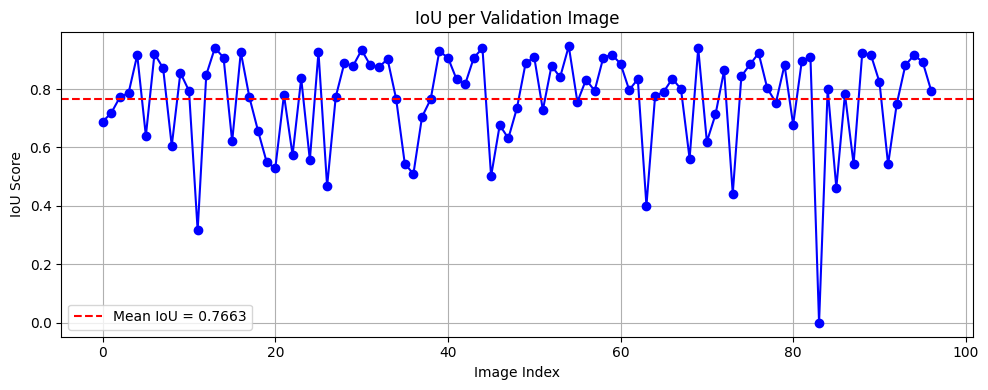

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, jaccard_score
from ultralytics import YOLO
from pathlib import Path

# Load trained model
model = YOLO("/kaggle/working/output_model/epoc4/weights/best.pt")

# Directories
images_dir = "/kaggle/working/valid/images"
labels_dir = "/kaggle/working/valid/labels"

# ---------- Helpers ----------
def yolo_txt_to_mask(txt_path, image_shape):
    h, w = image_shape[:2]
    mask = np.zeros((h, w), dtype=np.uint8)
    if not os.path.exists(txt_path):
        return mask
    with open(txt_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 7: continue
            polygon = list(map(float, parts[1:]))
            points = np.array(polygon).reshape(-1, 2)
            points[:, 0] *= w
            points[:, 1] *= h
            points = points.astype(np.int32)
            cv2.fillPoly(mask, [points], 1)
    return mask

def get_binary_mask(result, image_shape):
    h, w = image_shape[:2]
    mask = np.zeros((h, w), dtype=np.uint8)
    if result.masks is None:
        return mask
    for seg in result.masks.data:
        seg_np = seg.cpu().numpy()
        seg_resized = cv2.resize(seg_np, (w, h), interpolation=cv2.INTER_NEAREST)
        seg_binary = (seg_resized > 0.5).astype(np.uint8)
        mask = np.logical_or(mask, seg_binary).astype(np.uint8)
    return mask

def compute_iou(pred_mask, gt_mask):
    pred_flat = pred_mask.flatten()
    gt_flat = gt_mask.flatten()
    if np.sum(pred_flat) == 0 and np.sum(gt_flat) == 0:
        return 1.0
    return jaccard_score(gt_flat, pred_flat, average='binary')

def evaluate_model_pixelwise(y_trues, y_preds):
    y_trues = np.concatenate(y_trues)
    y_preds = np.concatenate(y_preds)

    mse = mean_squared_error(y_trues, y_preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_trues, y_preds)
    r2 = r2_score(y_trues, y_preds)

    # Handle division by zero in MAPE
    non_zero_mask = y_trues != 0
    if np.any(non_zero_mask):
        mape = np.mean(np.abs((y_trues[non_zero_mask] - y_preds[non_zero_mask]) / y_trues[non_zero_mask])) * 100
    else:
        mape = float('nan')  # or set to 0



    return {'IoU': mean_iou, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}


# ---------- Main Evaluation ----------
ious = []
all_gt = []
all_pred = []

image_filenames = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.png'))]

for img_filename in image_filenames:
    img_path = os.path.join(images_dir, img_filename)
    label_path = os.path.join(labels_dir, Path(img_filename).stem + ".txt")

    if not os.path.exists(label_path):
        continue

    img = cv2.imread(img_path)
    result = model(img_path, verbose=False)[0]  # Suppress internal YOLO output

    pred_mask = get_binary_mask(result, img.shape)
    gt_mask = yolo_txt_to_mask(label_path, img.shape)

    iou = compute_iou(pred_mask, gt_mask)
    ious.append(iou)

    all_gt.append(gt_mask.flatten())
    all_pred.append(pred_mask.flatten())

# ---------- Report ----------
mean_iou = np.mean(ious)
metrics = evaluate_model_pixelwise(all_gt, all_pred)

# ---------- Plot ----------
plt.figure(figsize=(10, 4))
plt.plot(ious, marker='o', linestyle='-', color='blue')
plt.axhline(mean_iou, color='red', linestyle='--', label=f"Mean IoU = {mean_iou:.4f}")
plt.title("IoU per Validation Image")
plt.xlabel("Image Index")
plt.ylabel("IoU Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
import sys
import logging

# Suppress warnings
warnings.filterwarnings("ignore")

# Suppress logger output
logging.getLogger("ultralytics").setLevel(logging.CRITICAL)

pixel_preds = []
pixel_gts = []

# Paths
images_dir = "/kaggle/working/valid/images"
labels_dir = "/kaggle/working/valid/labels"
model_path = "/kaggle/working/output_model/epoc4/weights/best.pt"

# Load model
model = YOLO(model_path)

def get_pred_mask(result, shape):
    """Convert predicted segmentation masks to binary mask."""
    mask = np.zeros(shape[:2], dtype=np.uint8)
    if result.masks is not None:
        for seg in result.masks.data:
            seg_np = seg.cpu().numpy()
            seg_resized = cv2.resize(seg_np, (shape[1], shape[0]))
            mask = np.logical_or(mask, seg_resized > 0.5).astype(np.uint8)
    return mask


def label_to_mask(label_path, shape):
    h, w = shape
    mask = np.zeros((h, w), dtype=np.uint8)
    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) >= 5:
                _, x_center, y_center, width, height = map(float, parts[:5])
                x1 = int((x_center - width / 2) * w)
                y1 = int((y_center - height / 2) * h)
                x2 = int((x_center + width / 2) * w)
                y2 = int((y_center + height / 2) * h)
                mask[y1:y2, x1:x2] = 1
    return mask

# Get prediction mask from YOLO result
def get_prediction_mask(result, shape):
    h, w = shape
    mask = np.zeros((h, w), dtype=np.uint8)
    if result.masks is not None:
        for seg in result.masks.data:
            seg_np = seg.cpu().numpy()
            seg_resized = cv2.resize(seg_np, (w, h))
            mask = np.logical_or(mask, seg_resized > 0.5)
    return mask.astype(np.uint8)




def get_gt_mask(label_path, shape):
    """Generate binary mask from YOLO-format polygon or box labels."""
    h, w = shape[:2]
    mask = np.zeros((h, w), dtype=np.uint8)
    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            cls = int(parts[0])
            coords = list(map(float, parts[1:]))

            if len(coords) == 4:
                # YOLO box format: x_center y_center width height
                x_center, y_center, width, height = coords
                x1 = int((x_center - width / 2) * w)
                y1 = int((y_center - height / 2) * h)
                x2 = int((x_center + width / 2) * w)
                y2 = int((y_center + height / 2) * h)
                cv2.rectangle(mask, (x1, y1), (x2, y2), 1, -1)
            else:
                # Polygon segmentation format
                points = np.array(coords).reshape(-1, 2) * [w, h]
                points = points.astype(np.int32)
                cv2.fillPoly(mask, [points], 1)
    return mask

def compute_iou(pred_mask, gt_mask):
    """Compute IoU between two binary masks."""
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    union = np.logical_or(pred_mask, gt_mask).sum()
    return intersection / union if union != 0 else 0

def compute_dice(pred, gt):
    intersection = np.logical_and(pred, gt).sum()
    return (2 * intersection) / (pred.sum() + gt.sum()) if (pred.sum() + gt.sum()) != 0 else 1.0

def compute_pixel_accuracy(pred, gt):
    return (pred == gt).sum() / pred.size



# Store results
ious, dices, accs = [], [], []
y_true_pixels, y_pred_pixels = [], []



for filename in os.listdir(images_dir):
    if filename.endswith(('.jpg', '.png')):
        image_path = os.path.join(images_dir, filename)
        label_path = os.path.join(labels_dir, filename.replace(".jpg", ".txt").replace(".png", ".txt"))

        if not os.path.exists(label_path):
            continue

        image = cv2.imread(image_path)
        h, w, _ = image.shape

        gt_mask = label_to_mask(label_path, (h, w))
        result = model(image_path)[0]  # Suppressing print output by not printing here
        pred_mask = get_prediction_mask(result, (h, w))

        ious.append(compute_iou(pred_mask, gt_mask))
        dices.append(compute_dice(pred_mask, gt_mask))
        accs.append(compute_pixel_accuracy(pred_mask, gt_mask))

        y_true_pixels.extend(gt_mask.flatten())
        y_pred_pixels.extend(pred_mask.flatten())

# Evaluation metrics
y_true_np = np.array(y_true_pixels)
y_pred_np = np.array(y_pred_pixels)


# Iterate over validation images
for filename in os.listdir(images_dir):
    if not filename.lower().endswith((".jpg", ".png", ".jpeg")):
        continue

    image_path = os.path.join(images_dir, filename)
    label_path = os.path.join(labels_dir, os.path.splitext(filename)[0] + ".txt")

    if not os.path.exists(label_path):
        continue

    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    # Run inference
    result = model(image_path, verbose=False)[0]

    # Get predicted and GT masks
    pred_mask = get_pred_mask(result, img.shape)
    gt_mask = get_gt_mask(label_path, img.shape)

    # Compute IoU
    iou = compute_iou(pred_mask, gt_mask)
    ious.append(iou)

    # For regression metrics
    pixel_preds.append(pred_mask.flatten())
    pixel_gts.append(gt_mask.flatten())

# Combine all pixels
y_pred = np.concatenate(pixel_preds)
y_true = np.concatenate(pixel_gts)

# Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
nonzero_indices = y_true != 0
if np.any(nonzero_indices):
    mape = np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
else:
    mape = 0.0
avg_iou = np.mean(ious)

val_results = model.val(data="/kaggle/working/data.yaml", split="val", iou=0.5, verbose=False)

# Extract mAP metrics
map_50 = val_results.box.map50  # mAP@0.5
map_5095 = val_results.box.map  # mAP@0.5:0.95



# 📊 Print Evaluation Summary
print("\n📊 Evaluation Summary:")
print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Dice Coefficient: {np.mean(dices):.4f}")
print(f"Pixel Accuracy: {np.mean(accs) * 100:.2f}%")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")
print(f"MAPE : {mape:.4f}%")
print(f"mAP@0.5: {map_50:.4f}")
print(f"mAP@0.5:0.95: {map_5095:.4f}")

val: Scanning /kaggle/working/valid/labels.cache... 97 images, 1 backgrounds, 1 corrupt: 100%|██████████| 97/97 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]



📊 Evaluation Summary:
Average IoU: 0.5555
Average Dice Coefficient: 0.4832
Pixel Accuracy: 49.66%
MSE  : 0.1543
RMSE : 0.3927
MAE  : 10.6978
R²   : 0.3770
MAPE : 7.5623%
mAP@0.5: 0.8870
mAP@0.5:0.95: 0.7271


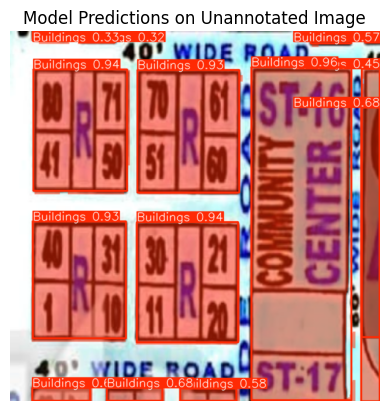

Predictions:
Label: 0.0, Confidence: 0.9558, Coordinates: [417.4345397949219, 62.15789794921875, 590.1861572265625, 638.3988037109375]
Label: 0.0, Confidence: 0.9435, Coordinates: [219.81137084960938, 330.6306457519531, 394.07745361328125, 538.8955078125]
Label: 0.0, Confidence: 0.9387, Coordinates: [40.76559066772461, 66.14987182617188, 202.84326171875, 276.7493896484375]
Label: 0.0, Confidence: 0.9340, Coordinates: [39.486122131347656, 329.98443603515625, 200.44967651367188, 531.9088134765625]
Label: 0.0, Confidence: 0.9336, Coordinates: [220.8543701171875, 67.96324157714844, 396.23876953125, 279.2023620605469]
Label: 0.0, Confidence: 0.6827, Coordinates: [167.86224365234375, 617.0390625, 263.89410400390625, 639.8704833984375]
Label: 0.0, Confidence: 0.6755, Coordinates: [607.0165405273438, 132.27659606933594, 639.5828857421875, 640.0]
Label: 0.0, Confidence: 0.6153, Coordinates: [38.14689636230469, 617.8418579101562, 138.383056640625, 639.8125]
Label: 0.0, Confidence: 0.5768, Coordi

In [13]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the trained model
model_path = "/kaggle/working/output_model/epoc4/weights/best.pt"  # Update with your trained model's path
model = YOLO(model_path)

# Path to the unannotated sample image
sample_image_path = "/kaggle/working/test/images/10_png.rf.98b2c265a471353913794cd75e549321.jpg"  # Update with the image you want to test

# Perform inference
results = model(sample_image_path)

# Access the first result in the list (the image you passed for testing)
result = results[0]

# Annotate the image with predictions
annotated_image_np = result.plot()  # Get the annotated image as a NumPy array

# Convert NumPy array to a PIL image
annotated_image = Image.fromarray(np.uint8(annotated_image_np))

# Save the annotated image to a file
output_dir = "/kaggle/working/inference_results"
os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists
annotated_image_path = os.path.join(output_dir, "annotated_image.jpg")
annotated_image.save(annotated_image_path)

# Display the annotated image
plt.imshow(annotated_image)
plt.axis("off")
plt.title("Model Predictions on Unannotated Image")
plt.show()

# Print the predictions (bounding boxes, labels, confidence scores)
print("Predictions:")
for i in range(len(result.boxes)):
    # Access the class, confidence, and coordinates
    label = result.boxes.cls[i].item()  # Get the class index (e.g., 'Buildings')
    confidence = result.boxes.conf[i].item()  # Confidence score
    coordinates = result.boxes.xyxy[i].tolist()  # Bounding box coordinates [x1, y1, x2, y2]
    
    print(f"Label: {label}, Confidence: {confidence:.4f}, Coordinates: {coordinates}")


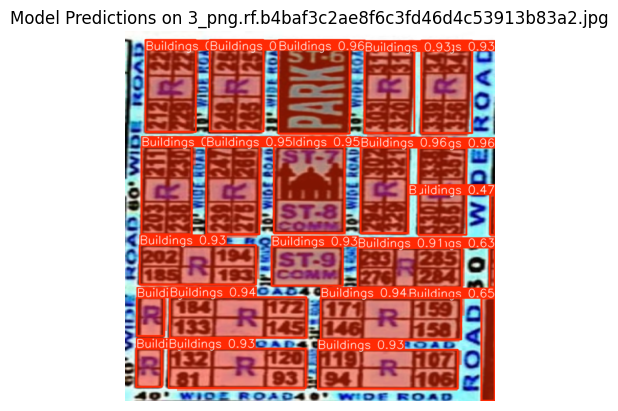

Predictions for 3_png.rf.b4baf3c2ae8f6c3fd46d4c53913b83a2.jpg:
Label: 0.0, Confidence: 0.9600, Coordinates: [265.15234375, 15.073108673095703, 388.4059143066406, 177.2958526611328]
Label: 0.0, Confidence: 0.9582, Coordinates: [407.2454833984375, 201.9078826904297, 489.5527648925781, 349.9919128417969]
Label: 0.0, Confidence: 0.9552, Coordinates: [507.5175476074219, 202.58499145507812, 590.3349609375, 352.0643310546875]
Label: 0.0, Confidence: 0.9524, Coordinates: [140.4418182373047, 200.3831787109375, 232.13035583496094, 351.73834228515625]
Label: 0.0, Confidence: 0.9521, Coordinates: [28.606014251708984, 200.50987243652344, 115.48412322998047, 351.8428955078125]
Label: 0.0, Confidence: 0.9451, Coordinates: [257.66412353515625, 200.8660888671875, 379.38665771484375, 349.023681640625]
Label: 0.0, Confidence: 0.9450, Coordinates: [146.4878387451172, 15.975823402404785, 239.25808715820312, 173.8790740966797]
Label: 0.0, Confidence: 0.9386, Coordinates: [338.7074279785156, 461.793884277343

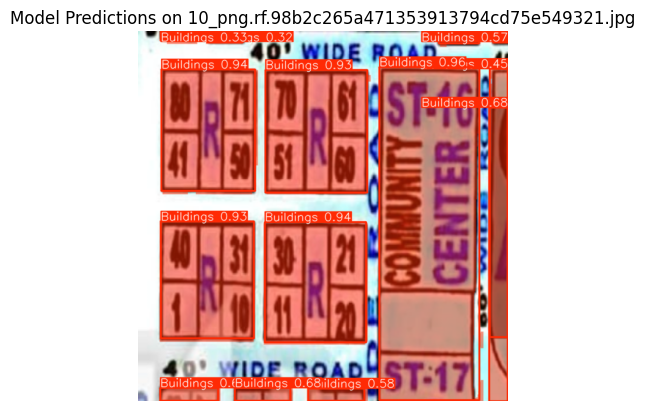

Predictions for 10_png.rf.98b2c265a471353913794cd75e549321.jpg:
Label: 0.0, Confidence: 0.9558, Coordinates: [417.4345397949219, 62.15789794921875, 590.1861572265625, 638.3988037109375]
Label: 0.0, Confidence: 0.9435, Coordinates: [219.81137084960938, 330.6306457519531, 394.07745361328125, 538.8955078125]
Label: 0.0, Confidence: 0.9387, Coordinates: [40.76559066772461, 66.14987182617188, 202.84326171875, 276.7493896484375]
Label: 0.0, Confidence: 0.9340, Coordinates: [39.486122131347656, 329.98443603515625, 200.44967651367188, 531.9088134765625]
Label: 0.0, Confidence: 0.9336, Coordinates: [220.8543701171875, 67.96324157714844, 396.23876953125, 279.2023620605469]
Label: 0.0, Confidence: 0.6827, Coordinates: [167.86224365234375, 617.0390625, 263.89410400390625, 639.8704833984375]
Label: 0.0, Confidence: 0.6755, Coordinates: [607.0165405273438, 132.27659606933594, 639.5828857421875, 640.0]
Label: 0.0, Confidence: 0.6153, Coordinates: [38.14689636230469, 617.8418579101562, 138.38305664062

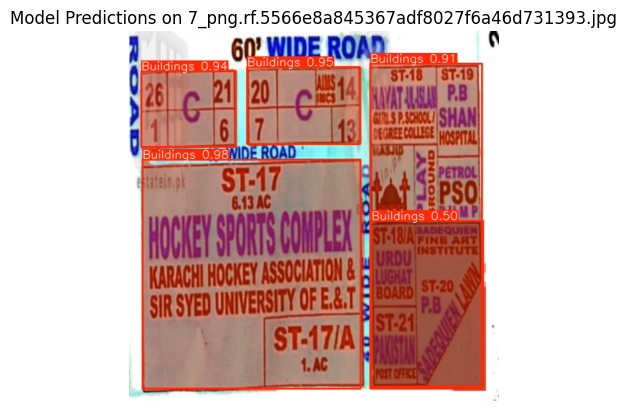

Predictions for 7_png.rf.5566e8a845367adf8027f6a46d731393.jpg:
Label: 0.0, Confidence: 0.9763, Coordinates: [23.545303344726562, 222.4768829345703, 400.7904052734375, 618.2770385742188]
Label: 0.0, Confidence: 0.9512, Coordinates: [204.767578125, 62.57568359375, 399.811767578125, 195.65512084960938]
Label: 0.0, Confidence: 0.9417, Coordinates: [21.128807067871094, 69.03155517578125, 184.4373321533203, 200.60321044921875]
Label: 0.0, Confidence: 0.9062, Coordinates: [417.806640625, 56.09001159667969, 610.534912109375, 618.3862915039062]
Label: 0.0, Confidence: 0.5017, Coordinates: [419.52728271484375, 328.0782470703125, 612.579833984375, 615.251220703125]


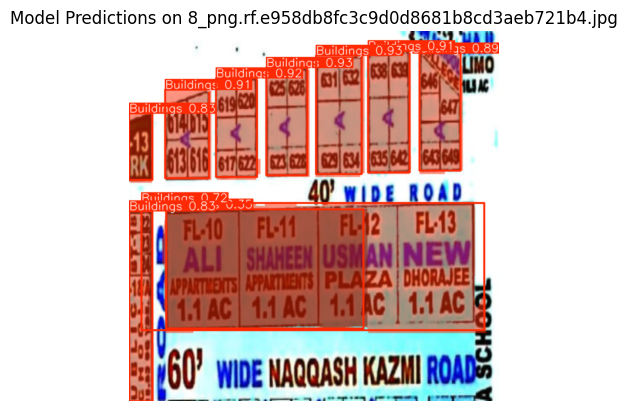

Predictions for 8_png.rf.e958db8fc3c9d0d8681b8cd3aeb721b4.jpg:
Label: 0.0, Confidence: 0.9311, Coordinates: [323.769775390625, 42.646026611328125, 402.7437744140625, 247.28628540039062]
Label: 0.0, Confidence: 0.9297, Coordinates: [237.83572387695312, 63.230953216552734, 308.0572814941406, 249.5076141357422]
Label: 0.0, Confidence: 0.9176, Coordinates: [150.25039672851562, 81.2312240600586, 221.60092163085938, 252.7910614013672]
Label: 0.0, Confidence: 0.9139, Coordinates: [62.753562927246094, 101.41155242919922, 138.65106201171875, 254.45816040039062]
Label: 0.0, Confidence: 0.9135, Coordinates: [413.9102783203125, 34.73337173461914, 485.21661376953125, 244.41195678710938]
Label: 0.0, Confidence: 0.8936, Coordinates: [502.6902770996094, 38.5795783996582, 573.747314453125, 241.02891540527344]
Label: 0.0, Confidence: 0.8309, Coordinates: [0.0, 311.163330078125, 40.9504508972168, 640.0]
Label: 0.0, Confidence: 0.8263, Coordinates: [0.08183002471923828, 142.82562255859375, 40.563083648681

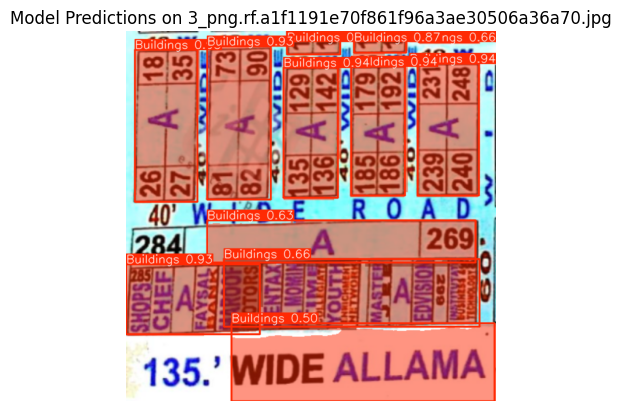

Predictions for 3_png.rf.a1f1191e70f861f96a3ae30506a36a70.jpg:
Label: 0.0, Confidence: 0.9449, Coordinates: [272.6798095703125, 63.12654495239258, 366.7774963378906, 288.4520568847656]
Label: 0.0, Confidence: 0.9391, Coordinates: [389.7003479003906, 61.82838439941406, 482.4835510253906, 284.60137939453125]
Label: 0.0, Confidence: 0.9351, Coordinates: [504.32763671875, 56.39129638671875, 610.1565551757812, 284.1922607421875]
Label: 0.0, Confidence: 0.9319, Coordinates: [140.3881072998047, 26.673297882080078, 250.51231384277344, 291.65643310546875]
Label: 0.0, Confidence: 0.9317, Coordinates: [0.7963371276855469, 403.79522705078125, 231.8740234375, 524.03662109375]
Label: 0.0, Confidence: 0.9304, Coordinates: [15.850048065185547, 32.24639892578125, 123.96955871582031, 295.6240234375]
Label: 0.0, Confidence: 0.8661, Coordinates: [394.71124267578125, 0.0, 484.55865478515625, 37.13240051269531]
Label: 0.0, Confidence: 0.8581, Coordinates: [278.5070495605469, 0.0, 370.6698913574219, 40.92552

In [14]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the trained model
model_path = "/kaggle/working/output_model/epoc4/weights/best.pt"  # Update with your trained model's path
model = YOLO(model_path)

# Path to the directory containing your unannotated sample images
samples_dir = "/kaggle/working/test/images"  # Update with the correct directory path

# Create a directory to save the results
output_dir = "/kaggle/working/inference_results"
os.makedirs(output_dir, exist_ok=True)

# Iterate through all image files in the samples directory
for img_filename in os.listdir(samples_dir):
    # Check if the file is an image (you can extend this with more extensions if needed)
    if img_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        sample_image_path = os.path.join(samples_dir, img_filename)
        
        # Perform inference on the image
        results = model(sample_image_path)

        # Access the first result (the image you passed for testing)
        result = results[0]

        # Annotate the image with predictions
        annotated_image_np = result.plot()  # Get the annotated image as a NumPy array

        # Convert NumPy array to a PIL image
        annotated_image = Image.fromarray(np.uint8(annotated_image_np))

        # Save the annotated image to a file
        annotated_image_path = os.path.join(output_dir, f"annotated_{img_filename}")
        annotated_image.save(annotated_image_path)

        # Display the annotated image
        plt.imshow(annotated_image)
        plt.axis("off")
        plt.title(f"Model Predictions on {img_filename}")
        plt.show()

        # Print the predictions (bounding boxes, labels, confidence scores)
        print(f"Predictions for {img_filename}:")
        for i in range(len(result.boxes)):
            # Access the class, confidence, and coordinates
            label = result.boxes.cls[i].item()  # Get the class index (e.g., 'Buildings')
            confidence = result.boxes.conf[i].item()  # Confidence score
            coordinates = result.boxes.xyxy[i].tolist()  # Bounding box coordinates [x1, y1, x2, y2]

            print(f"Label: {label}, Confidence: {confidence:.4f}, Coordinates: {coordinates}")
        print("="*50)  # Separator between results of different images


In [15]:
import os
from ultralytics import YOLO
from PIL import Image
import numpy as np
from pathlib import Path

# Load the trained model
model_path = "/kaggle/working/output_model/epoc4/weights/best.pt"  # Update with your trained model's path
model = YOLO(model_path)

# Directory containing the images to annotate
input_images_dir = "/kaggle/working/test/images"  # Update with your input image directory

# Create output directories for images and labels
images_output_dir = "/kaggle/working/annotated_results/images"
labels_output_dir = "/kaggle/working/annotated_results/labels"
os.makedirs(images_output_dir, exist_ok=True)
os.makedirs(labels_output_dir, exist_ok=True)

# Perform inference on all images in the input directory
for img_file in os.listdir(input_images_dir):
    img_path = os.path.join(input_images_dir, img_file)
    
    # Check if the file is an image (you can add more extensions if needed)
    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        results = model(img_path)  # Perform inference
        result = results[0]  # Get the first result
        
        # Annotate the image
        annotated_image_np = result.plot()  # Get the annotated image as a NumPy array
        
        # Convert NumPy array to a PIL image
        annotated_image = Image.fromarray(np.uint8(annotated_image_np))
        
        # Save the annotated image in the specified output directory
        annotated_image_save_path = os.path.join(images_output_dir, f"annotated_{Path(img_file).stem}.jpg")
        annotated_image.save(annotated_image_save_path)

        # Save corresponding labels in a text file in the specified output directory
        label_save_path = os.path.join(labels_output_dir, f"{Path(img_file).stem}.txt")
        with open(label_save_path, 'w') as label_file:
            for i in range(len(result.boxes)):
                label = result.boxes.cls[i].item()  # Class index (label)
                confidence = result.boxes.conf[i].item()  # Confidence score
                coordinates = result.boxes.xyxy[i].tolist()  # Bounding box coordinates [x1, y1, x2, y2]
                
                # Write label information to the file (format: class_id confidence x1 y1 x2 y2)
                label_file.write(f"{label} {confidence:.4f} {' '.join(map(str, coordinates))}\n")

print("Annotated images and labels have been saved successfully!")


Annotated images and labels have been saved successfully!
